In [2]:
from matplotlib import pyplot as plt
from matplotlib import pylab #displays arrays as images for easy error checking
import numpy as np
import networkx as nx

%matplotlib inline

In [24]:
#Important variables
network_size = 1000 #side length of network boundaries
CNT_length_normal = 1000 #normal length of CNT at center of distribution
CNT_length_stddev = 2 #standard deviation of CNT length from normal
CNT_num_tubes = 100 #number of tubes in film

CNT_init = np.zeros((CNT_num_tubes+2,6))

#creating the pseudo tubes that will act as the edges in the network
CNT_init[0:2,:] = [[network_size,0,0,0,0,network_size],
                   [network_size,0,1,0,network_size,network_size]]

#Generating tube information
#randomly assigning tube lengths distributed around a set tube length
CNT_init[2:,0] = np.random.normal(CNT_length_normal, CNT_length_stddev, CNT_num_tubes)

#randomly assign starting point and orientation
CNT_init[2:,1:4] = np.random.rand(CNT_num_tubes, 3)

#applying scaling to random numbers so they match the needed values
scaling_factor = np.array([1, network_size, network_size, 2*np.pi, 1, 1])
CNT_init = CNT_init * scaling_factor

#calculating the x-range for the tubes
CNT_init[:,5] = np.cos(CNT_init[:,3]) * CNT_init[:,0]

#calculating slope
CNT_init[:,3] = np.tan(CNT_init[:,3])

#calculating the y-intercept of the lines
CNT_init[:,4] = CNT_init[:,2] - CNT_init[:,3] * CNT_init[:,2]

#delete this in final code this is just a reference to know what is in each column
#header = ['Length','x-start','y-start','slope','y-intercept','x-high']

In [25]:
#generating a boolean array of the tubes that intersect
CNT_intersect = np.zeros((CNT_num_tubes,CNT_num_tubes),dtype=bool)
for i in range(0,CNT_num_tubes):
    m1 = CNT_init[i,3]
    b1 = CNT_init[i,4]
    for j in range(i+1,CNT_num_tubes):
        #checking for parallel tubes
        if m1 == CNT_init[j,3]:
            CNT_intersect[i,j] = False
            continue
        x_intersect = (CNT_init[j,4] - b1) / (m1 - CNT_init[j,3])
        if CNT_init[i,1] <= x_intersect <= CNT_init[i,5] and CNT_init[j,1] <= x_intersect <= CNT_init[j,5]:
            CNT_intersect[i,j] = True

Printing this boolean array will be a lot of information, especially as the number of tubes in the network grows. Since it is a boolean array and there are only two possible values, it will be easier to visualize and understand how many intersections there are by turning the array into an image where True is one color and False is another.

The number of intersections in the network is 94.
Below is a list where each element represents how many intersections the respective tube has:
[ 3  2  0 12  0  8  0 11  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0  0  0
  6  0  0  0  9  6  0  0  0  0  0  0  0  0  0  6  0  0  0  0  0  0  2  0  0
  0  5  0  0  0  0  0  0  5  0  0  0  0  0  0  0  4  0  0  0  0  0  0  1  0
  1  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]


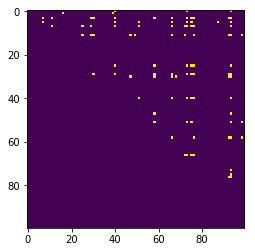

In [26]:
#THIS CELL IS ONLY FOR TROUBLESHOOTING, IT DOES NOT CODE FOR ANYTHING
#this cell visually shows the true values as yellow pixels
#generating a boolean array of the tubes that intersect
CNT_intersectALL = np.zeros((CNT_num_tubes,CNT_num_tubes),dtype=bool)
for i in range(0,CNT_num_tubes):
    m1 = CNT_init[i,3]
    b1 = CNT_init[i,4]
    for j in range(0,CNT_num_tubes):
        if i == j or m1 == CNT_init[j,3]:
            continue
        x_intersect = (CNT_init[j,4] - b1) / (m1 - CNT_init[j,3])
        if CNT_init[i,1] <= x_intersect <= CNT_init[i,5] and CNT_init[j,1] <= x_intersect <= CNT_init[j,5]:
            CNT_intersectALL[i,j] = True

pylab.imshow(CNT_intersect)
CNT_perTubeIntersect = np.sum(CNT_intersect,axis=1)
print('The number of intersections in the network is {}.'.format(np.sum(CNT_intersect)))
print('Below is a list where each element represents how many intersections the respective tube has:')
print(CNT_perTubeIntersect)

In [27]:
#gives the indicies along the x-axis of the true values as the 
#first array and the y-values as the second array
CNT_tube_num1, CNT_tube_num2 = np.where(CNT_intersect)
edges = [None]*np.sum(CNT_intersect)

#formatting the intersection data so it will fit work with networkX
for k in range(0,np.sum(CNT_intersect)):
    edges[k] = (CNT_tube_num1[k], CNT_tube_num2[k], {'resistance': 10.})
print(CNT_tube_num1)
print(CNT_tube_num2)
print(edges)

[ 0  0  0  1  1  3  3  3  3  3  3  3  3  3  3  3  3  5  5  5  5  5  5  5  5
  7  7  7  7  7  7  7  7  7  7  7 11 11 11 11 11 11 11 11 11 11 11 25 25 25
 25 25 25 29 29 29 29 29 29 29 29 29 30 30 30 30 30 30 40 40 40 40 40 40 47
 47 51 51 51 51 51 58 58 58 58 58 66 66 66 66 73 75 76 76]
[40 73 93 16 39  7 11 29 30 40 58 66 73 75 76 92 93  7 40 51 66 73 75 87 93
 11 25 29 40 51 66 72 73 75 76 93 25 29 30 47 49 66 72 76 92 93 98 40 58 73
 75 76 93 30 40 58 66 73 75 76 92 93 47 58 66 68 92 93 51 66 73 75 76 93 58
 93 58 73 75 93 98 66 76 92 93 98 72 73 75 76 93 93 92 93]
[(0, 40, {'resistance': 10.0}), (0, 73, {'resistance': 10.0}), (0, 93, {'resistance': 10.0}), (1, 16, {'resistance': 10.0}), (1, 39, {'resistance': 10.0}), (3, 7, {'resistance': 10.0}), (3, 11, {'resistance': 10.0}), (3, 29, {'resistance': 10.0}), (3, 30, {'resistance': 10.0}), (3, 40, {'resistance': 10.0}), (3, 58, {'resistance': 10.0}), (3, 66, {'resistance': 10.0}), (3, 73, {'resistance': 10.0}), (3, 75, {'resistance': 

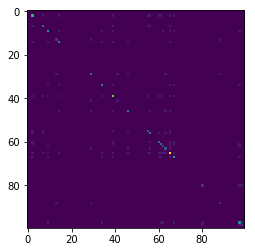

In [31]:
#generating a boolean array of the tubes that intersect and creating the G-matrix from that data
G_matrix = np.zeros((CNT_num_tubes,CNT_num_tubes),dtype=bool)
for i in range(0,CNT_num_tubes):
    m1 = CNT_init[i,3]
    b1 = CNT_init[i,4]
    for j in range(0,CNT_num_tubes):
        #Preventing errors from checking if a line intersects with itself
        if i == j:
            G_matrix[i,j] = False
            continue
        x_intersect = (CNT_init[j,4] - b1) / (m1 - CNT_init[j,3])
        if CNT_init[i,1] <= x_intersect <= CNT_init[i,5] and CNT_init[j,1] <= x_intersect <= CNT_init[j,5]:
            G_matrix[i,j] = True
G_matrix = G_matrix * 2
for k in range(0,CNT_num_tubes):
    G_matrix[k,k] = np.sum(G_matrix[k,:])
pylab.imshow(G_matrix)

In [34]:
a = np.array([[3,1], [1,2]])
b = np.array([9,8])
x = np.linalg.solve(a, b)
print(a)
print(b)
print(x)

[[3 1]
 [1 2]]
[9 8]
[ 2.  3.]


In [ ]:
# We will use the wonderfully useful library networkx to allow us
# to represent graphs in a nice way.

example_graph = nx.Graph()
example_graph.clear()
example_graph.add_nodes_from(list("ABCDEF"), current=0.) # initialize with all current = 0.
edges = [
    ('A', 'B', {'resistance': 10.}),
    ('A', 'C', {'resistance': 1.}),
    ('B', 'C', {'resistance': 3.}),
    ('B', 'D', {'resistance': 100.}),
    ('C', 'F', {'resistance': 1.}),
    ('D', 'E', {'resistance': 4.}),
    ('D', 'F', {'resistance': 1.}),
    ('E', 'F', {'resistance': 15.}),
]

example_graph.add_edges_from(edges)

In [4]:
#THIS CELL IS ONLY FOR TROUBLESHOOTING, IT DOES NOT CODE FOR ANYTHING
def num_intersect(network_size, CNT_length_normal, CNT_length_stddev, CNT_num_tubes, num_iterations=1000):
    """
    This function is for testing the number of intersections in the network
    generated with the given inputs.
    """
    #initializing empty array
    data = np.zeros(num_iterations)
    
    for k in range(0,num_iterations):
        #initializing data array
        CNT_init = np.zeros((CNT_num_tubes,6))

        #Generating tube information
        #randomly assigning tube lengths distributed around a set tube length
        CNT_init[:,0] = np.random.normal(CNT_length_normal, CNT_length_stddev, CNT_num_tubes)

        #randomly assign starting point and orientation
        CNT_init[:,1:4] = np.random.rand(CNT_num_tubes, 3)

        #applying scaling to random numbers so they match the needed values
        scaling_factor = np.array([1, network_size, network_size, 2*np.pi, 1, 1])
        CNT_init = CNT_init * scaling_factor

        #calculating the x-range for the tubes
        CNT_init[:,5] = np.cos(CNT_init[:,3]) * CNT_init[:,0]

        #calculating slope
        CNT_init[:,3] = np.tan(CNT_init[:,3])

        #calculating the y-intercept of the lines
        CNT_init[:,4] = CNT_init[:,2] - CNT_init[:,3] * CNT_init[:,2]

        #array_size = (CNT_init[:,0].size,CNT_init[0,:].size)
        CNT_intersect = np.zeros((CNT_num_tubes,CNT_num_tubes),dtype=bool)
        for i in range(0,CNT_num_tubes):
            m1 = CNT_init[i,3]
            b1 = CNT_init[i,4]
            for j in range(i+1,CNT_num_tubes):
                x_intersect = (CNT_init[j,4] - b1) / (m1 - CNT_init[j,3])
                if CNT_init[i,1] <= x_intersect <= CNT_init[i,5] and CNT_init[j,1] <= x_intersect <= CNT_init[j,5]:
                    CNT_intersect[i,j] = True
        data[k] = np.sum(CNT_intersect)
    plt.hist(data)
    plt.show()

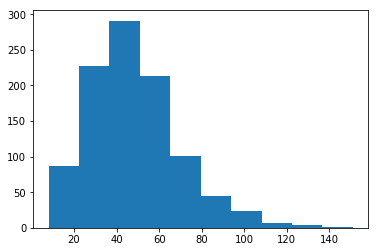

In [5]:
#THIS CELL IS ONLY FOR TROUBLESHOOTING, IT DOES NOT CODE FOR ANYTHING
#run this cell to get a histogram of the number of connections for the given conditions
network_size = 1000 #side length of network boundaries
CNT_length_normal = 1000 #normal length of CNT at center of distribution
CNT_length_stddev = 2 #standard deviation of CNT length from normal
CNT_num_tubes = 100 #number of tubes in film

num_intersect(network_size, CNT_length_normal, CNT_length_stddev, CNT_num_tubes)

In [ ]:
#THIS CELL IS OLD CODE AND IS NOT FOR USE IN THE FINAL PROGRAM
def intersect(EOL_1,EOL_2):
    #Calculates if two line segments intersect given two equations of lines given the
    #slopes, y-intercepts, and acceptable range
    #Input format: [slope, y_intercept, x_range]
    m1 = EOL_1[0] #slope of line 1
    m2 = EOL_2[0] #slope of line 2
    b1 = EOL_1[1] #Y-intercept of line 1
    b2 = EOL_2[1] #Y-intercept of line 2
    x_range_1 = EOL_1[2]
    x_range_2 = EOL_2[2]
    
    #Checking for parallel
    if m1 == m2:
        return False
    
    x_intersect = (b2 - b1) / (m1 - m2)
    
    return x_intersect in range(*x_range_1) and x_intersect in range(*x_range_2)

In [ ]:
#THIS CELL IS OLD CODE AND IS NOT FOR USE IN THE FINAL PROGRAM
def EOL(endpoint_1,endpoint_2):
    #Determines the slope, y-intercept of the parent line, and range of x-values of a line
    #segment made by 2 points. Endpoints are input as a list of x and y values e.g. [x,y]
    x1 = endpoint_1[0]
    y1 = endpoint_1[1]
    x2 = endpoint_2[0]
    y2 = endpoint_2[1]
    
    #Preventing undefined values for infinite slope
    if x1 == x2:
        slope = 1e10
    else:
        slope = (y2 - y1) / (x2 - x1)
    y_intercept = y1 - slope * x1
    #finding range of x-values the segment runs for to make determining intersection easier
    x_range = [np.min(x1,x2),np.max(x1,x2)]
    return slope, y_intercept, x_range